In [2]:
import pandas as pd
from sciviso import *
from sciutil import SciUtil
import numpy as np
import seaborn as sns
# Have a look at clustering each of these
from sklearn.decomposition import PCA

u = SciUtil()

disease = 'UterineCorpusEndometrialCarcinoma'
cpg_sample_df = pd.read_csv(f'../../output_data/{disease}/{disease}_samples_CpG.csv')
meth_df = pd.read_csv(f'../../output_data/{disease}/{disease}_DNAMethylation.csv')
cols = list(cpg_sample_df['Sample'].values)



In [5]:
cpg_sample_df

,SafeCases,Sample,TumorStage_x,Stage_x,AgeYears_x,CaseFiles_x,CaseFileCounts_x,Case ID_x,Cases Submitter ID_x,Related Entities_x,...,treatment_dose_y,treatment_dose_units_y,treatment_effect_y,treatment_effect_indicator_y,treatment_frequency_y,treatment_intent_type_y,treatment_or_therapy_y,treatment_outcome_y,treatment_type_y,Disease
0,C3L.01249,C3L.01249_Tumor_CpG_UterineCorpusEndometrialCa...,Stage I,Early,-65.0,C3L.01249_Tumor_RNA_UterineCorpusEndometrialCa...,3,636ec295-118a-11e9-afb9-0a9c39d33490,C3L-01249,NaN,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,UterineCorpusEndometrialCarcinoma
1,C3L.00098,C3L.00098_Tumor_CpG_UterineCorpusEndometrialCa...,Stage I,Early,-63.0,C3L.00098_Tumor_RNA_UterineCorpusEndometrialCa...,3,cdbb0274-1189-11e9-afb9-0a9c39d33490,C3L-00098,NaN,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,UterineCorpusEndometrialCarcinoma
2,C3L.01311,C3L.01311_Tumor_CpG_UterineCorpusEndometrialCa...,Stage I,Early,-55.0,C3L.01311_Tumor_RNA_UterineCorpusEndometrialCa...,4,78ff5de8-118a-11e9-afb9-0a9c39d33490,C3L-01311,NaN,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,UterineCorpusEndometrialCarcinoma
3,C3L.00156,C3L.00156_Tumor_CpG_UterineCorpusEndometrialCa...,Stage I,Early,-56.0,C3L.00156_Tumor_RNA_UterineCorpusEndometrialCa...,3,e47da4ba-1189-11e9-afb9-0a9c39d33490,C3L-00156,NaN,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,UterineCorpusEndometrialCarcinoma
4,C3L.01282,C3L.01282_Tumor_CpG_UterineCorpusEndometrialCa...,Stage I,Early,-64.0,C3L.01282_Tumor_RNA_UterineCorpusEndometrialCa...,4,71dfac9d-118a-11e9-afb9-0a9c39d33490,C3L-01282,NaN,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,UterineCorpusEndometrialCarcinoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,C3L.00137,C3L.00137_Tumor_CpG_UterineCorpusEndometrialCa...,Stage I,Early,-60.0,C3L.00137_Tumor_RNA_UterineCorpusEndometrialCa...,3,d4873729-1189-11e9-afb9-0a9c39d33490,C3L-00137,NaN,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,UterineCorpusEndometrialCarcinoma
87,C3L.00008,C3L.00008_Tumor_CpG_UterineCorpusEndometrialCa...,Stage I,Early,-58.0,C3L.00008_Tumor_RNA_UterineCorpusEndometrialCa...,2,c3ca10d9-1189-11e9-afb9-0a9c39d33490,C3L-00008,NaN,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,UterineCorpusEndometrialCarcinoma
88,C3N.00379,C3N.00379_Tumor_CpG_UterineCorpusEndometrialCa...,Stage I,Early,-41.0,C3N.00379_Tumor_RNA_UterineCorpusEndometrialCa...,2,9beb3211-118a-11e9-afb9-0a9c39d33490,C3N-00379,NaN,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,UterineCorpusEndometrialCarcinoma
89,C3N.01520,C3N.01520_Tumor_CpG_UterineCorpusEndometrialCa...,Stage I,Early,-69.0,C3N.01520_Tumor_RNA_UterineCorpusEndometrialCa...,3,c9bdcd45-118a-11e9-afb9-0a9c39d33490,C3N-01520,NaN,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,UterineCorpusEndometrialCarcinoma


In [4]:
meth_df


,id,C3L.01304_Tumor_CpG_9c67db83.52c5.47da.84a6.2b1f5656f4e6,C3L.01304_Tumor_CpG_fff14bc7.bc8d.4cc5.b4f9.48e9f3bedd6e,C3L.01304_Tumor_CpG_cd5456c6.2d10.4042.a769.b5756ef7f676,C3L.01304_Tumor_CpG_85f60341.ac02.44e2.9746.ce970f13cb2c,C3L.01304_Tumor_CpG_5f60bf07.4b8e.4de1.899b.8f3571379c38,C3L.01304_Tumor_CpG_7b3ff5b3.7287.4217.98b3.8103dc9d06bf,C3L.01304_Tumor_CpG_3c919c64.73b9.4fef.a334.46768b37fbfd,C3L.01304_Tumor_CpG_2ecb74fe.1e2f.4188.b089.1befaf421248,C3L.01304_Tumor_CpG_a271d67a.71c1.463a.b53d.049efd316075,...,C3L.01304_Tumor_CpG_484888a7.0090.41ea.b22e.111c06d20eb3,C3L.01304_Tumor_CpG_ab675e12.06e6.4393.bfd5.0d8091971970,C3L.01304_Tumor_CpG_912dcd8d.9c09.4921.b2f7.691feaf95586,C3L.01304_Tumor_CpG_b1609494.f176.4c50.b84b.744f0c69cea8,C3L.01304_Tumor_CpG_90ac8e99.fc19.45c5.91ef.e42a1d151dbd,C3L.01304_Tumor_CpG_1e690442.08e9.4fe3.b27d.41064342c214,C3L.01304_Tumor_CpG_1515bca7.9a2c.48a3.af7f.7a5f0ea08e4f,C3L.01304_Tumor_CpG_ffa72b75.f39f.4dd2.847a.e6fdb496c4e8,C3L.01304_Tumor_CpG_8fe16eca.0638.4354.8ccf.cc4b1776d33c,C3L.01304_Tumor_CpG_bbb8ae19.7da0.4c0f.8883.ba2b054e07e3
0,cg18478105,0.015668,0.017453,0.014199,0.018900,0.021483,0.023247,0.014001,0.015136,0.013513,...,0.027309,0.022153,0.014367,0.013649,0.018096,0.014351,0.011730,0.014975,0.014982,0.015013
1,cg01763666,0.880795,0.904329,0.854298,0.953001,0.911143,0.836440,0.829253,0.923022,0.931361,...,0.846273,0.896744,0.672326,0.816616,0.881703,0.948298,0.941669,0.931361,0.922763,0.893325
2,cg25813447,0.245292,0.347507,0.400863,0.406277,0.402509,0.370980,0.398950,0.359384,0.135435,...,0.333188,0.391496,0.435251,0.333329,0.415430,0.271884,0.453416,0.401532,0.151887,0.346275
3,cg07779434,0.257481,0.347997,0.363295,0.371896,0.330039,0.307964,0.316548,0.365659,0.478551,...,0.368624,0.320405,0.396795,0.299204,0.386189,0.323365,0.437937,0.336906,0.352670,0.320991
4,cg13417420,0.385382,0.045850,0.019259,0.826291,0.023383,0.046270,0.100885,0.460928,0.741132,...,0.110826,0.337939,0.018968,0.034839,0.530133,0.488337,0.023426,0.022153,0.480255,0.018109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865913,cg23079522,0.903891,0.848089,0.913368,0.926941,0.889775,0.921588,0.898725,0.751425,0.942775,...,0.935877,0.919236,0.922754,0.933590,0.918246,0.832227,0.925817,0.919511,0.910636,0.892430
865914,cg16818145,0.961326,0.903048,0.925507,0.933278,0.954018,0.938342,0.890507,0.943742,0.923493,...,0.935876,0.924141,0.943720,0.934973,0.941893,0.952399,0.939121,0.948269,0.949437,0.939424
865915,cg14585103,0.537909,0.688269,0.575299,0.591494,0.674166,0.637394,0.724585,0.528284,0.329176,...,0.508173,0.816197,0.621633,0.711688,0.232596,0.273349,0.314196,0.246962,0.599258,0.723908
865916,cg10633746,0.055346,0.077390,0.077093,0.054897,0.085739,0.092737,0.061523,0.111817,0.057424,...,0.167616,0.130121,0.059781,0.123570,0.052594,0.075734,0.063288,0.063144,0.071801,0.073015


In [3]:

meth_df = meth_df.replace(0, 0.001)
meth_df = meth_df.replace(1.0, 0.999)

mean_meth = np.nanmean(meth_df[cols].values, axis=1)
u.dp(['Methylation size: ', meth_df.shape, 'Mean meth:', mean_meth])

meth_df = meth_df[mean_meth > 0.05]

u.dp(['Methylation size after 0.05 filter: ', meth_df.shape, 'Mean meth:', mean_meth])

mean_meth = np.nanmean(meth_df[cols].values, axis=1)
meth_df = meth_df[mean_meth < 0.95]

u.dp(['Methylation size after 0.95 filter: ', meth_df.shape, 'Mean meth:', mean_meth])

corr = meth_df[cols].corr()
# Print out the minimum correlation:
mean_cor = np.nanmean(corr, axis=1)
corr['mean_corr'] = mean_cor
corr.sort_values(by=['mean_corr'])

import matplotlib.pyplot as plt
# Plot out the mean correlation values so we can choose a good filter.
plt.hist(mean_cor, bins=20)
plt.title(f'min corr: {np.min(corr)}')
plt.show()


# Filter the shitty patients
corr_sorted = corr.sort_values(by=['mean_corr'])
corr_sorted = corr_sorted[corr_sorted['mean_corr'] < 0.7]
cols_to_omit = [c for c in corr_sorted.index]

u.dp(['Methylation columns to omit: '])

print('\n'.join(cols_to_omit))
cols_to_keep = [c for c in meth_df.columns if c not in cols_to_omit]
cpg_filtered = meth_df[cols_to_keep]

u.dp(['New size:', cpg_filtered.shape])



# Drop CpGs with > 50% missing values
cpg_filtered = cpg_filtered[cpg_filtered.isnull().sum(axis=1) < len(cpg_filtered.values[0])/2]

u.dp(['After dropping rows with 50% nulls:', cpg_filtered.shape])

# Filter sample df to only include those samples
sample_df = cpg_sample_df[cpg_sample_df['Sample'].isin(cols_to_keep)]


# Fill NAs with 0's
df = cpg_filtered.fillna(0.001)


cols = list(sample_df['Sample'].values)
vals = df[cols].values.T

pca = PCA(n_components=2)
pca_values = pca.fit_transform(vals)

var_ratio = pca.fit(vals).explained_variance_ratio_

plt.rcParams['figure.figsize'] = [4, 4]

vis_df = pd.DataFrame()
vis_df['PC_1'] = pca_values[:, 0]
vis_df['PC_2'] = pca_values[:, 1]
vis_df['Stage'] = sample_df['TumorStage_x'].values
vis_df['Disease'] = sample_df['Disease'].values
vis_df['CondID'] = sample_df['CondID'].values

sns.scatterplot(vis_df, x='PC_1', y='PC_2', hue='Stage', s=100, alpha=0.5)
plt.show()

sns.scatterplot(vis_df, x='PC_1', y='PC_2', hue='CondID', s=100, alpha=0.5)
plt.show()


sns.scatterplot(vis_df, x='PC_1', y='PC_2', hue='Disease', s=100, alpha=0.5)
plt.show()

# Drop duplicates based on the case ID and the condition type
u.dp([sample_df.shape])
sample_df_dedup = sample_df.drop_duplicates(subset=['SafeCases', 'CondID'])
u.dp([sample_df_dedup.shape])



KeyError: "None of [Index(['C3L.01249_Tumor_CpG_UterineCorpusEndometrialCarcinoma_7b3ff5b3.7287.4217.98b3.8103dc9d06bf',\n       'C3L.00098_Tumor_CpG_UterineCorpusEndometrialCarcinoma_f6f9fd5e.1d79.4ffd.a359.6b4ef2cf0af6',\n       'C3L.01311_Tumor_CpG_UterineCorpusEndometrialCarcinoma_a4aaf8fc.4dae.43fe.ae01.94f7b1f4e198',\n       'C3L.00156_Tumor_CpG_UterineCorpusEndometrialCarcinoma_9cd7e90e.842f.4db0.86d2.3a53594b4cad',\n       'C3L.01282_Tumor_CpG_UterineCorpusEndometrialCarcinoma_ab675e12.06e6.4393.bfd5.0d8091971970',\n       'C3L.00006_Tumor_CpG_UterineCorpusEndometrialCarcinoma_98ce1940.0703.4692.ab00.a3dd80f8d836',\n       'C3L.01257_Tumor_CpG_UterineCorpusEndometrialCarcinoma_82d73085.b704.465e.af5e.9ccae0e68536',\n       'C3L.00932_Tumor_CpG_UterineCorpusEndometrialCarcinoma_5baf00d8.65e8.4639.a8cf.f40031cb1b49',\n       'C3N.00200_Tumor_CpG_UterineCorpusEndometrialCarcinoma_ec0b9797.178d.4d9d.9ba0.5164c9352fdc',\n       'C3L.01248_Tumor_CpG_UterineCorpusEndometrialCarcinoma_d91a41f0.e3c4.46a2.8e64.7f84ef6eae11',\n       'C3L.01247_Tumor_CpG_UterineCorpusEndometrialCarcinoma_77cd8bdb.1820.4bd6.b99c.1ef548160adf',\n       'C3L.00949_Tumor_CpG_UterineCorpusEndometrialCarcinoma_f5bd414c.24cc.4d8a.92ef.9601fe4be7d8',\n       'C3L.00563_Tumor_CpG_UterineCorpusEndometrialCarcinoma_a137a297.287f.4079.9dc1.d26402b375c4',\n       'C3L.00942_Tumor_CpG_UterineCorpusEndometrialCarcinoma_cce4b91b.6e51.4ed7.bece.e88b29dcbe07',\n       'C3N.00743_Tumor_CpG_UterineCorpusEndometrialCarcinoma_96578b4b.8f9c.4ae7.b9d2.9672a0ed28ac',\n       'C3N.00322_Tumor_CpG_UterineCorpusEndometrialCarcinoma_9c67db83.52c5.47da.84a6.2b1f5656f4e6',\n       'C3L.01312_Tumor_CpG_UterineCorpusEndometrialCarcinoma_64931d8b.61e1.4485.bdb2.fc9e1e7bbe44',\n       'C3N.00836_Tumor_CpG_UterineCorpusEndometrialCarcinoma_b1609494.f176.4c50.b84b.744f0c69cea8',\n       'C3N.00323_Tumor_CpG_UterineCorpusEndometrialCarcinoma_e026bc8c.8574.4bbf.b946.005c2e7c3c65',\n       'C3L.00361_Tumor_CpG_UterineCorpusEndometrialCarcinoma_85f60341.ac02.44e2.9746.ce970f13cb2c',\n       'C3N.00326_Tumor_CpG_UterineCorpusEndometrialCarcinoma_1515bca7.9a2c.48a3.af7f.7a5f0ea08e4f',\n       'C3L.01744_Tumor_CpG_UterineCorpusEndometrialCarcinoma_f91a6828.76f6.4ad6.850f.cf0cbd8079b0',\n       'C3N.00386_Tumor_CpG_UterineCorpusEndometrialCarcinoma_d59f3113.3fb0.4b3e.8167.2a94444e83a6',\n       'C3L.00905_Tumor_CpG_UterineCorpusEndometrialCarcinoma_4cd8a373.47b2.4ddf.82a1.99e6cdb97bdd',\n       'C3N.00333_Tumor_CpG_UterineCorpusEndometrialCarcinoma_e7f1f48f.7354.428e.930d.9463af62a18d',\n       'C3N.00324_Tumor_CpG_UterineCorpusEndometrialCarcinoma_6337847d.06a7.453b.a465.6e77dab7ac80',\n       'C3L.00601_Tumor_CpG_UterineCorpusEndometrialCarcinoma_64d5639d.caab.4ec5.870f.6b098f444d04',\n       'C3N.00328_Tumor_CpG_UterineCorpusEndometrialCarcinoma_00600ef8.9453.4e0b.8d17.95418ba4c75e',\n       'C3L.01246_Tumor_CpG_UterineCorpusEndometrialCarcinoma_26b97db4.652b.4a6c.ae88.17efa15f6f4f',\n       'C3N.00866_Tumor_CpG_UterineCorpusEndometrialCarcinoma_befabaa9.2149.4611.ac4f.eaedf9306d0b',\n       'C3L.00157_Tumor_CpG_UterineCorpusEndometrialCarcinoma_f80586a3.8099.4f0b.a2c3.4a8db120bfdc',\n       'C3L.00947_Tumor_CpG_UterineCorpusEndometrialCarcinoma_fa369ffc.031b.4455.bedd.f61cb1f87603',\n       'C3L.00143_Tumor_CpG_UterineCorpusEndometrialCarcinoma_704336ef.2227.4fb7.b5b3.3c92c31f48b2',\n       'C3N.00383_Tumor_CpG_UterineCorpusEndometrialCarcinoma_14dadcad.56d7.42ac.8d4a.c27d07f46fb2',\n       'C3L.00770_Tumor_CpG_UterineCorpusEndometrialCarcinoma_9438c797.47ec.484e.b77d.40bb3f58522e',\n       'C3N.00848_Tumor_CpG_UterineCorpusEndometrialCarcinoma_ee807efe.14eb.4399.a392.e0294dc05bad',\n       'C3L.01256_Tumor_CpG_UterineCorpusEndometrialCarcinoma_2c1ea600.393c.4543.a519.f6bf4f879973',\n       'C3N.01211_Tumor_CpG_UterineCorpusEndometrialCarcinoma_1e690442.08e9.4fe3.b27d.41064342c214',\n       'C3N.00847_Tumor_CpG_UterineCorpusEndometrialCarcinoma_449ff38c.16c4.444f.b034.dbddc47c5adf',\n       'C3L.01304_Tumor_CpG_UterineCorpusEndometrialCarcinoma_44ab6e73.bb4d.48e0.b516.f83c9c8ed496',\n       'C3L.00771_Tumor_CpG_UterineCorpusEndometrialCarcinoma_49b83ef9.baef.4cec.a54c.06c53728ff82',\n       'C3L.00605_Tumor_CpG_UterineCorpusEndometrialCarcinoma_fcad65d8.c324.4233.8c73.0e1074a75510',\n       'C3L.00769_Tumor_CpG_UterineCorpusEndometrialCarcinoma_cd5456c6.2d10.4042.a769.b5756ef7f676',\n       'C3L.00586_Tumor_CpG_UterineCorpusEndometrialCarcinoma_cbeea796.5768.472a.9d75.b14ba014a203',\n       'C3N.01349_Tumor_CpG_UterineCorpusEndometrialCarcinoma_ff54cd92.76ef.4ba2.b023.27ea16f572b8',\n       'C3L.00930_Tumor_CpG_UterineCorpusEndometrialCarcinoma_efdb6923.3113.44f0.a425.81f6a0f91362',\n       'C3L.01925_Tumor_CpG_UterineCorpusEndometrialCarcinoma_7f65a07d.aff3.40a5.a3b7.9f13136c53bd',\n       'C3L.00963_Tumor_CpG_UterineCorpusEndometrialCarcinoma_a48602ad.7c3f.470f.b126.dcc2f43b0225',\n       'C3L.00781_Tumor_CpG_UterineCorpusEndometrialCarcinoma_86509277.d44f.4c2b.aa64.cf21774aa8c5',\n       'C3L.01275_Tumor_CpG_UterineCorpusEndometrialCarcinoma_dbe7896f.e622.4c88.8c42.59970e707091',\n       'C3N.01267_Tumor_CpG_UterineCorpusEndometrialCarcinoma_0f5b3a65.6876.4110.96a0.69cebae28687',\n       'C3L.00356_Tumor_CpG_UterineCorpusEndometrialCarcinoma_0a62781e.4431.4bc9.b708.de354ebae9e8',\n       'C3L.00090_Tumor_CpG_UterineCorpusEndometrialCarcinoma_dd2e69c5.b158.431b.afe5.a0c00ba3033a',\n       'C3N.01537_Tumor_CpG_UterineCorpusEndometrialCarcinoma_072576b8.ebf1.4776.b707.1aea1067ebcf',\n       'C3L.01252_Tumor_CpG_UterineCorpusEndometrialCarcinoma_e61c5a5b.fc37.48bb.940e.3e461f2b79af',\n       'C3N.00334_Tumor_CpG_UterineCorpusEndometrialCarcinoma_d496f862.23ed.4163.a63d.f91020b3fa34',\n       'C3L.00938_Tumor_CpG_UterineCorpusEndometrialCarcinoma_3c919c64.73b9.4fef.a334.46768b37fbfd',\n       'C3L.00136_Tumor_CpG_UterineCorpusEndometrialCarcinoma_5f60bf07.4b8e.4de1.899b.8f3571379c38',\n       'C3N.00850_Tumor_CpG_UterineCorpusEndometrialCarcinoma_f77f9cd9.b257.4389.911d.5695f8b84493',\n       'C3L.00032_Tumor_CpG_UterineCorpusEndometrialCarcinoma_484888a7.0090.41ea.b22e.111c06d20eb3',\n       'C3N.00389_Tumor_CpG_UterineCorpusEndometrialCarcinoma_cff3115b.ca9d.4f73.86a6.b7b8f644b4d9',\n       'C3N.00340_Tumor_CpG_UterineCorpusEndometrialCarcinoma_e4ace6e9.dcfe.4b26.933c.e8184009749a',\n       'C3N.00337_Tumor_CpG_UterineCorpusEndometrialCarcinoma_c0143d4d.a6d8.4cdf.8585.385fecb122f0',\n       'C3N.01219_Tumor_CpG_UterineCorpusEndometrialCarcinoma_862e0b44.d190.4eb4.bfa6.a4d8d54a2204',\n       'C3L.00449_Tumor_CpG_UterineCorpusEndometrialCarcinoma_fff14bc7.bc8d.4cc5.b4f9.48e9f3bedd6e',\n       'C3N.00339_Tumor_CpG_UterineCorpusEndometrialCarcinoma_ba7e6e28.e151.4c43.a419.60226ed979d9',\n       'C3N.01521_Tumor_CpG_UterineCorpusEndometrialCarcinoma_876fc2d0.c008.4e1b.993d.be3f419b42d1',\n       'C3L.00918_Tumor_CpG_UterineCorpusEndometrialCarcinoma_2ecb74fe.1e2f.4188.b089.1befaf421248',\n       'C3L.00961_Tumor_CpG_UterineCorpusEndometrialCarcinoma_bbb8ae19.7da0.4c0f.8883.ba2b054e07e3',\n       'C3N.01802_Tumor_CpG_UterineCorpusEndometrialCarcinoma_ea64c705.49f6.45b9.a827.ac3665a343d3',\n       'C3L.00145_Tumor_CpG_UterineCorpusEndometrialCarcinoma_ec4465d9.1342.4e42.9bbe.361c505afdd4',\n       'C3L.00767_Tumor_CpG_UterineCorpusEndometrialCarcinoma_4e8a84d2.6909.426f.9bd4.b7694f54c948',\n       'C3N.01510_Tumor_CpG_UterineCorpusEndometrialCarcinoma_90ac8e99.fc19.45c5.91ef.e42a1d151dbd',\n       'C3L.00358_Tumor_CpG_UterineCorpusEndometrialCarcinoma_b5b38b27.55f0.4490.ac5f.3474deb145cc',\n       'C3L.00946_Tumor_CpG_UterineCorpusEndometrialCarcinoma_1dc8a2ed.0224.42f3.8727.91cba789960b',\n       'C3N.01825_Tumor_CpG_UterineCorpusEndometrialCarcinoma_c9eb5450.1025.48f1.b385.33a44018cc5b',\n       'C3N.01825_Tumor_CpG_UterineCorpusEndometrialCarcinoma_55fe6469.2a50.4fa4.92f9.2122c9128b5b',\n       'C3L.00362_Tumor_CpG_UterineCorpusEndometrialCarcinoma_2e76d1d3.22a5.4481.a535.e8be685033d5',\n       'C3N.01212_Tumor_CpG_UterineCorpusEndometrialCarcinoma_8fe16eca.0638.4354.8ccf.cc4b1776d33c',\n       'C3N.01217_Tumor_CpG_UterineCorpusEndometrialCarcinoma_649b610b.4659.41bb.b553.5516a0cf5435',\n       'C3N.00335_Tumor_CpG_UterineCorpusEndometrialCarcinoma_c43dae2e.b305.42bd.b7a0.67bd3bf577d7',\n       'C3N.01003_Tumor_CpG_UterineCorpusEndometrialCarcinoma_238196f9.0d0e.4206.90dc.63489ba8314b',\n       'C3N.00321_Tumor_CpG_UterineCorpusEndometrialCarcinoma_912dcd8d.9c09.4921.b2f7.691feaf95586',\n       'C3L.00139_Tumor_CpG_UterineCorpusEndometrialCarcinoma_3a74d440.9356.40cf.adec.947ebedc2138',\n       'C3L.00413_Tumor_CpG_UterineCorpusEndometrialCarcinoma_ffa72b75.f39f.4dd2.847a.e6fdb496c4e8',\n       'C3N.00377_Tumor_CpG_UterineCorpusEndometrialCarcinoma_ae9c78da.5bbc.4b3a.a7fb.05edc3ab2f74',\n       'C3L.00137_Tumor_CpG_UterineCorpusEndometrialCarcinoma_0dbe6625.23af.4cb9.ad31.f89a566a08ec',\n       'C3L.00008_Tumor_CpG_UterineCorpusEndometrialCarcinoma_78ceec83.32cb.469b.bc52.e8aa3bd04700',\n       'C3N.00379_Tumor_CpG_UterineCorpusEndometrialCarcinoma_71946969.0f07.40a2.8309.af4c3aadb824',\n       'C3N.01520_Tumor_CpG_UterineCorpusEndometrialCarcinoma_a271d67a.71c1.463a.b53d.049efd316075',\n       'C3N.00388_Tumor_CpG_UterineCorpusEndometrialCarcinoma_7cd78ad0.fd44.4bf1.8700.e4cf732fa1b6'],\n      dtype='object')] are in the [columns]"

In [ ]:
sample_df_dedup[sample_df_dedup['Sample'].isin(samples)].to_csv(f'../../output_data/{disease}/{disease}_filtered_samples_CpG.csv', index=False)
df[['id'] + samples].to_csv(f'../../output_data/{disease}/{disease}_filtered_CpG.csv', index=False)


## Test RNA

--------------------------------------------------------------------------------
            RNA size: 	(60660, 257)	Mean counts:	630.9619808253007	             
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
           RNA size after dropping missing gene names: 	(60660, 257)	           
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                 RNA size after 10 count filter: 	(29550, 257)	                 
--------------------------------------------------------------------------------


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/histogram.py:70: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(values, fit=norm, kde=self.plot_kde, rug=self.plot_rug, hist=self.plot_hist,


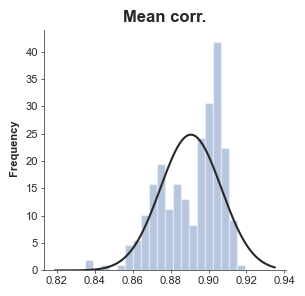

--------------------------------------------------------------------------------
RNA size after correlation filter: 	0.8576340479542994	0.8665704366331389	(29550, 257)	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                             RNA columns to omit: 	                             
--------------------------------------------------------------------------------
C3N.00194_Tumor_RNA_ClearCellRenalCellCarcinoma_71ea835e.68f4.4336.ac3b.b123bc5573ac
C3N.00315_Tumor_RNA_ClearCellRenalCellCarcinoma_1c9dab07.5857.4e3a.9069.d2e13d10329f
C3L.00011_Tumor_RNA_ClearCellRenalCellCarcinoma_38999274.4c4d.432b.9ed8.c17fd2308bdc
C3N.00491_Normal_RNA_ClearCellRenalCellCarcinoma_7d63425b.9386.44c1.9c28.bea3f206531d
C3N.00154_Tumor_RNA_ClearCellRenalCellCarcinoma_872bad3a.5f4a.48fb.9310.ffbc7927972a
C3L.00447_Normal_RNA_ClearCellRenalCellCarcinoma_e4a148e6.13c5.468c.8e5c.0056a8ff

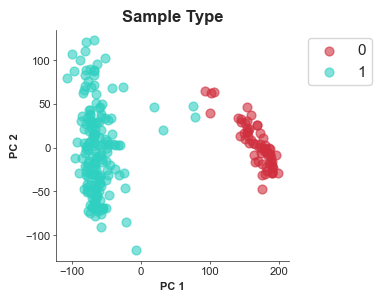

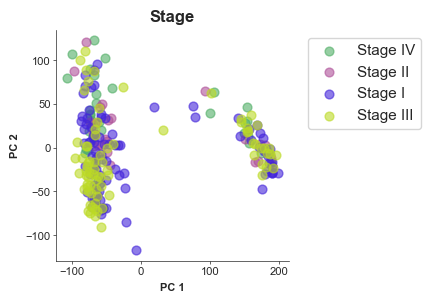

--------------------------------------------------------------------------------
                                  (236, 634)	                                   
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                                  (155, 634)	                                   
--------------------------------------------------------------------------------


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sciutil import SciUtil

u = SciUtil()

disease = 'UterineCorpusEndometrialCarcinoma'
#disease = 'LungSquamousCellCarcinoma'
#disease = 'HeadandNeckSquamousCellCarcinoma'
#disease = 'LungAdenocarcinoma'
#disease = 'AcuteMyeloidLeukemia'
disease = 'ClearCellRenalCellCarcinoma'

rna_sample_df = pd.read_csv(f'../../output_data/{disease}/{disease}_samples_RNA.csv')
df = pd.read_csv(f'../../output_data/{disease}/{disease}_RNA.csv')
# log2 the columns
cols = list(rna_sample_df['Sample'].values)

df = df.dropna(subset=['gene_name'])
df = df.fillna(0)

mean_rna = np.nanmean(df[cols].values, axis=1)
u.dp(['RNA size: ', df.shape, 'Mean counts:', np.mean(mean_rna)])

u.dp(['RNA size after dropping missing gene names: ', df.shape])

df = df[mean_rna > 10]
u.dp(['RNA size after 10 count filter: ', df.shape])

for c in cols:
    df[c] = np.log2(df[c].values + 1)
    
corr = df[cols].corr()

# Print out the minimum correlation:
mean_cor = np.nanmean(corr, axis=1)
corr['mean_corr'] = mean_cor
corr.sort_values(by=['mean_corr'])

# Plot out the mean correlation values so we can choose a good filter.
h =  Histogram(corr, x='mean_corr', title='Mean corr.')
h.plot()
plt.show()

# Filter the shitty patients
corr_sorted = corr.sort_values(by=['mean_corr'])
cutoff = np.mean(corr_sorted.mean_corr) - (1.5*np.std(corr_sorted.mean_corr))
corr_sorted = corr_sorted[corr_sorted['mean_corr'] < cutoff]

u.dp(['RNA size after correlation filter: ', np.nanmean(corr_sorted.mean_corr), cutoff, df.shape])

cols_to_omit = [c for c in corr_sorted.index]

u.dp(['RNA columns to omit: '])

print('\n'.join(cols_to_omit))

cols_to_keep = [c for c in df.columns if c not in cols_to_omit]
df = df[cols_to_keep]


u.dp(['RNA shape after dropping columns:', df.shape])

# Drop RNA samples with > 50% missing values
df = df[df.isnull().sum(axis=1) < len(df.values[0])/2]

u.dp(['After dropping rows with 50% nulls:', df.shape])

# Filter sample df to only include those samples
sample_df = rna_sample_df[rna_sample_df['Sample'].isin(cols_to_keep)]

# Fill NAs with 0's
df = df.fillna(0)

import pandas as pd
from sciviso import *
from sciutil import SciUtil
import seaborn as sns
# Have a look at clustering each of these
from sklearn.decomposition import PCA
BL_OR = ['#E76F51', '#F4A261', '#E9C46A', '#2A9D8F', '#264653']
OR_BL = ['#FFEBD2', '#FFA364', '#FC7643', '#AF4F41', '#273248']
PINKS = ['#FFCDB2', '#FFB4A2', '#E5989B', '#B5838D', '#6D6875']
PURPS = ['#E99E75', '#44426E', '#776483', '#BBAAB8', '#292643']
BRIGHTS = ['#9FE7F5', '#429EBD', '#053F5C', '#F7AD19', '#F27F0C', '#FB6D10', '#EB3E1B', '#86112E', '#4D3347', '#2E2E41']
REDS = ['#CE8054', '#B35340', '#6F3637', '#4B2B31']
OPP = ['#51AE66', '#AE5199', '#4325DA', '#BCDA25']

cols = list(sample_df['Sample'].values)
vals = df[cols].values.T

pca = PCA(n_components=2)
pca_values = pca.fit_transform(vals)
var_ratio = pca.fit(vals).explained_variance_ratio_
plt.rcParams['figure.figsize'] = [4, 4]
vis_df = pd.DataFrame()
vis_df['PC_1'] = pca_values[:, 0]
vis_df['PC_2'] = pca_values[:, 1]
vis_df['Stage'] = sample_df['TumorStage_x'].values
vis_df['Disease'] = sample_df['Disease'].values
vis_df['CondID'] = sample_df['CondID'].values

sc = Scatterplot(vis_df, x='PC_1', y='PC_2', title=f'Sample Type', xlabel='PC 1', ylabel='PC 2',
                 add_legend=False, color_col='CondID', 
                 config={'palette':['#D02F3E', '#2FD0C1'], 's': 40, 'opacity': 0.6, 'figsize': (3,3)})
sc.plot()
plt.show()

sc = Scatterplot(vis_df, x='PC_1', y='PC_2', title=f'Stage', xlabel='PC 1', ylabel='PC 2',
                 add_legend=False, color_col='Stage', 
                 config={'palette': OPP, 's': 40,
                         'opacity': 0.6, 'figsize': (3,3)})
sc.plot()
plt.show()

# Drop duplicates based on the case ID and the condition type
u.dp([sample_df.shape])
sample_df_dedup = sample_df.drop_duplicates(subset=['SafeCases', 'CondID'])
u.dp([sample_df_dedup.shape])

samples = list(sample_df_dedup['Sample'].values)

sample_df_dedup.to_csv(f'../../output_data/{disease}/{disease}_filtered_samples_RNA.csv', index=False)
# Read back in then save
df = pd.read_csv(f'../../output_data/{disease}/{disease}_RNA.csv')
df[['gene_id', 'gene_name'] + samples].to_csv(f'../../output_data/{disease}/{disease}_filtered_RNA.csv', index=False)


--------------------------------------------------------------------------------
            RNA size: 	(60660, 175)	Mean counts:	526.2039977396995	             
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
           RNA size after dropping missing gene names: 	(60660, 175)	           
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                 RNA size after 10 count filter: 	(31283, 175)	                 
--------------------------------------------------------------------------------


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/histogram.py:70: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(values, fit=norm, kde=self.plot_kde, rug=self.plot_rug, hist=self.plot_hist,


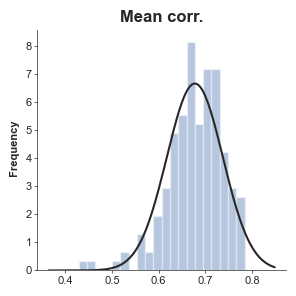

In [78]:
rna_sample_df = pd.read_csv(f'../../output_data/{disease}/{disease}_samples_RNA.csv')
df = pd.read_csv(f'../../output_data/{disease}/{disease}_RNA.csv')

cols = list(rna_sample_df['Sample'].values)

df = df.dropna(subset=['gene_name'])
mean_rna = np.nanmean(df[cols].values, axis=1)
u.dp(['RNA size: ', df.shape, 'Mean counts:', np.mean(mean_rna)])

u.dp(['RNA size after dropping missing gene names: ', df.shape])

df = df[mean_rna > 10]
u.dp(['RNA size after 10 count filter: ', df.shape])

corr = df[cols].corr()

# Print out the minimum correlation:
mean_cor = np.nanmean(corr, axis=1)
corr['mean_corr'] = mean_cor
corr.sort_values(by=['mean_corr'])

# Plot out the mean correlation values so we can choose a good filter.
h =  Histogram(corr, x='mean_corr', title='Mean corr.')
h.plot()
#plt.hist(mean_cor, bins=20)
#plt.title(f'min corr: {np.min(corr)}')
plt.show()

# Filter the shitty patients
corr_sorted = corr.sort_values(by=['mean_corr'])

0.5874235468237284

In [31]:
sample_df['CondID'].value_counts()

CondID
1    156
0     15
Name: count, dtype: int64

In [9]:
bio_df = pd.read_csv('biospecimen.cart.2023-07-17/sample.tsv', sep='\t')
bio_df['composition'].value_counts()

composition
Solid Tissue                       3219
Peripheral Blood Components NOS    1687
Buffy Coat                          102
'--                                 100
Name: count, dtype: int64

In [14]:
bio_df['tumor_descriptor']

0       '--
1       '--
2       '--
3       '--
4       '--
       ... 
5103    '--
5104    '--
5105    '--
5106    '--
5107    '--
Name: tumor_descriptor, Length: 5108, dtype: object

In [23]:
bio_df.set_index('case_submitter_id', inplace=True)
clin_df.set_index('case_submitter_id', inplace=True)


In [32]:
bio_df

,project_id,case_id,sample_id,sample_submitter_id,biospecimen_anatomic_site,biospecimen_laterality,catalog_reference,composition,current_weight,days_to_collection,...,sample_type_id,shortest_dimension,state,time_between_clamping_and_freezing,time_between_excision_and_freezing,tissue_collection_type,tissue_type,tumor_code,tumor_code_id,tumor_descriptor
case_submitter_id,,,,,,,,,,,,,,,,,,,,,
C3L-00966,CPTAC-3,6bddd554-1643-462b-828c-d292d6f8b10f,020ad367-9158-42c1-a671-b5d5e5b276c8,C3L-00966-01,'--,'--,'--,Solid Tissue,'--,'--,...,'--,'--,released,'--,'--,'--,Tumor,'--,'--,'--
C3L-00966,CPTAC-3,6bddd554-1643-462b-828c-d292d6f8b10f,0e74294f-a06c-45a8-a7fb-8d7c14dd7f7e,C3L-00966-04,'--,'--,'--,Solid Tissue,'--,'--,...,'--,'--,released,'--,'--,'--,Tumor,'--,'--,'--
C3L-00966,CPTAC-3,6bddd554-1643-462b-828c-d292d6f8b10f,5259c55c-3ff9-4526-b48b-9b7c2181236c,C3L-00966-02,'--,'--,'--,Solid Tissue,'--,'--,...,'--,'--,released,'--,'--,'--,Tumor,'--,'--,'--
C3L-00966,CPTAC-3,6bddd554-1643-462b-828c-d292d6f8b10f,7e2e0643-87e1-4d8b-b85e-965ea9ee2c8a,C3L-00966-07,'--,'--,'--,Solid Tissue,'--,'--,...,'--,'--,released,'--,18.0,'--,Normal,'--,'--,'--
C3L-00966,CPTAC-3,6bddd554-1643-462b-828c-d292d6f8b10f,aa4703de-cc5b-45c2-aeb8-b5ead7284541,C3L-00966-06,'--,'--,'--,Solid Tissue,'--,'--,...,'--,'--,released,'--,'--,'--,Normal,'--,'--,'--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3L-00586,CPTAC-3,ffef8d1d-f99d-4cc0-9f49-46488bfca131,703107fe-bd15-4160-afd9-be1b066f787f,C3L-00586-06,'--,'--,'--,Solid Tissue,'--,'--,...,'--,'--,released,'--,28.0,'--,Normal,'--,'--,'--
C3L-00586,CPTAC-3,ffef8d1d-f99d-4cc0-9f49-46488bfca131,7c2b7d24-9886-4339-b17e-4091edd0664b,C3L-00586-13,'--,'--,'--,Solid Tissue,'--,'--,...,'--,'--,released,'--,28.0,'--,Tumor,'--,'--,'--
C3L-00586,CPTAC-3,ffef8d1d-f99d-4cc0-9f49-46488bfca131,bb527653-07bb-4b53-ba36-dec01f0ccf46,C3L-00586-31,'--,'--,'--,Peripheral Blood Components NOS,'--,'--,...,'--,'--,released,'--,'--,'--,Normal,'--,'--,'--


In [21]:
clin_df = pd.read_csv(f'clinical.tsv', sep='\t')
clin_df['primary_diagnosis'].value_counts()

primary_diagnosis
Endometrioid adenocarcinoma, NOS    239
Adenocarcinoma, NOS                 223
Renal cell carcinoma, NOS           218
Squamous cell carcinoma, NOS        215
Infiltrating duct carcinoma, NOS    156
Glioblastoma                         99
Name: count, dtype: int64

In [27]:
bio_clin = clin_df.join(bio_df, lsuffix='_l', how='inner')
bio_clin

,case_id_l,project_id_l,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,ethnicity,...,sample_type_id,shortest_dimension,state,time_between_clamping_and_freezing,time_between_excision_and_freezing,tissue_collection_type,tissue_type,tumor_code,tumor_code_id,tumor_descriptor
case_submitter_id,,,,,,,,,,,,,,,,,,,,,
11LU013,a231aaba-b584-42c4-96a9-f010bd1b3c66,CPTAC-3,'--,'--,Cancer Related,'--,'--,-21627,'--,not reported,...,'--,'--,released,'--,'--,'--,Tumor,'--,'--,'--
11LU013,a231aaba-b584-42c4-96a9-f010bd1b3c66,CPTAC-3,'--,'--,Cancer Related,'--,'--,-21627,'--,not reported,...,'--,'--,released,'--,'--,'--,Normal,'--,'--,'--
11LU016,fd0cd324-0557-4946-8ea9-55ad2032a31b,CPTAC-3,'--,'--,Cancer Related,'--,'--,-22733,445,not reported,...,'--,'--,released,'--,'--,'--,Tumor,'--,'--,'--
11LU016,fd0cd324-0557-4946-8ea9-55ad2032a31b,CPTAC-3,'--,'--,Cancer Related,'--,'--,-22733,445,not reported,...,'--,'--,released,'--,'--,'--,Normal,'--,'--,'--
11LU016,fd0cd324-0557-4946-8ea9-55ad2032a31b,CPTAC-3,'--,'--,Cancer Related,'--,'--,-22733,445,not reported,...,'--,'--,released,'--,'--,'--,Normal,'--,'--,'--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-04382,80327e65-e924-4293-82b5-bd538b5910bf,CPTAC-3,'--,'--,'--,'--,'--,-17484,'--,not hispanic or latino,...,'--,'--,released,'--,'--,'--,Normal,'--,'--,'--
C3N-04611,f0dedbcb-1151-4bdb-8f32-9c3311d298fb,CPTAC-3,'--,'--,'--,'--,'--,-20250,'--,not reported,...,'--,'--,released,'--,16.0,'--,Tumor,'--,'--,'--
C3N-04611,f0dedbcb-1151-4bdb-8f32-9c3311d298fb,CPTAC-3,'--,'--,'--,'--,'--,-20250,'--,not reported,...,'--,'--,released,'--,16.0,'--,Tumor,'--,'--,'--


In [29]:
e = bio_clin[bio_clin['primary_diagnosis'] == 'Endometrioid adenocarcinoma, NOS']
e['tissue_type'].value_counts()

tissue_type
Tumor           649
Normal          472
Not Reported     14
Name: count, dtype: int64

In [33]:
cases = [c.replace('.', '-') for c in ]

Index(['gene_id', 'gene_name',
       'C3L.01249_Tumor_RNA_UterineCorpusEndometrialCarcinoma_c24391f6.bf81.43ca.a340.42e37ba71aad',
       'C3L.01249_Tumor_RNA_UterineCorpusEndometrialCarcinoma_bfa1fdff.05fe.413f.a17b.6c820032de58',
       'C3L.00098_Tumor_RNA_UterineCorpusEndometrialCarcinoma_0cb2f7d7.6a5a.4547.90f5.4a819580f0f8',
       'C3L.00098_Tumor_RNA_UterineCorpusEndometrialCarcinoma_94a1832b.d5e4.46db.bf3e.aa6161797a89',
       'C3L.01311_Tumor_RNA_UterineCorpusEndometrialCarcinoma_bfbbf133.5f61.4c42.9b82.a5d40be0928e',
       'C3L.01311_Tumor_RNA_UterineCorpusEndometrialCarcinoma_8f7ababe.0c64.4e4d.8b67.eceb48a8e626',
       'C3L.01311_Normal_RNA_UterineCorpusEndometrialCarcinoma_5b3f93a7.98c2.439f.a10c.fccecf7372c9',
       'C3L.00156_Tumor_RNA_UterineCorpusEndometrialCarcinoma_d27f625c.df1f.45cd.810d.8104b03e8468',
       ...
       'C3L.00413_Tumor_RNA_UterineCorpusEndometrialCarcinoma_c29469bf.70fb.4030.aea1.5c1b6042d0f7',
       'C3L.00413_Tumor_RNA_UterineCorpusEndomet